# Internet Firewall Data

https://archive.ics.uci.edu/dataset/542/internet+firewall+data

In [165]:
from src import *
import numpy as np

In [166]:
data = readData('data/log2.csv')

Informacje ogólne o zbiorze danych:

Każdy wpis reprezentuje informacje o pewnej komunikacji użytkownika z serwerem oraz akcję jaką podjął firewall w ramach tej komunikacji.

Zbiór składa się z **12** cech:

|  | Source Port | Destination Port NAT | Source Port NAT | Destination Port | Action | Bytes | Bytes Sent | Bytes Received | Packets | Elapsed Time (sec) | pkts_sent | pkts_received |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| Typ | int | int | int | int | string | int | int | int | int | int | int | int |
| Opis | Port źródłowy | Port docelowy | Port źródłowy NAT | Port docelowy NAT | Akcja, którą podjął firewall | Całkowita liczba bajtów | Liczba wysłanych bajtów | Liczba odebranych bajtów | Całkowita liczba pakietów | Czas trwania komunikacji | Liczba wysłanych pakietów | Liczba odebranych pakietów |
| Zakres | 0 - 65534 | 0 - 65535 | 0 - 65535 | 0 - 65535 | allow action drop reset-both | 60 - 1 mld | 60 - 1 mld | 60 - 1 mld | 1 - 1 mln | 0 - 10824 | 1 - 747.520 | 1 - 327.208 |

In [167]:
data

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0


In [168]:
data.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [169]:
data['Action'].unique()

array(['allow', 'drop', 'deny', 'reset-both'], dtype=object)

In [170]:
import matplotlib.pyplot as plt

In [171]:
#rowsNum = 11
#colsNum = 2
#
#fig, axes = plt.subplots(rowsNum, colsNum, figsize=(16, 66))
#
#index = 0
#
#for column_name in data.columns:
#    if data[column_name].dtype not in ['int64', 'float64']:
#        continue
#    row, col = index, 0
#    index += 1
#
#    axes[row, col].hist(data[column_name], bins=60)
#    axes[row, col].set_title('Histogram dla ' + column_name)
#    axes[row, col].set_xlabel('Wartość')
#    axes[row, col].set_ylabel('Ilość wystąpień')
#
#    axes[row, col + 1].hist(data[column_name], bins=60)
#    axes[row, col + 1].set_title('Histogram dla ' + column_name + '(Skala logarytmiczna)')
#    axes[row, col + 1].set_xlabel('Wartość')
#    axes[row, col + 1].set_ylabel('Log (Ilość wystąpień)')
#    axes[row, col + 1].set_yscale('log')
#
#plt.tight_layout()
#plt.show()

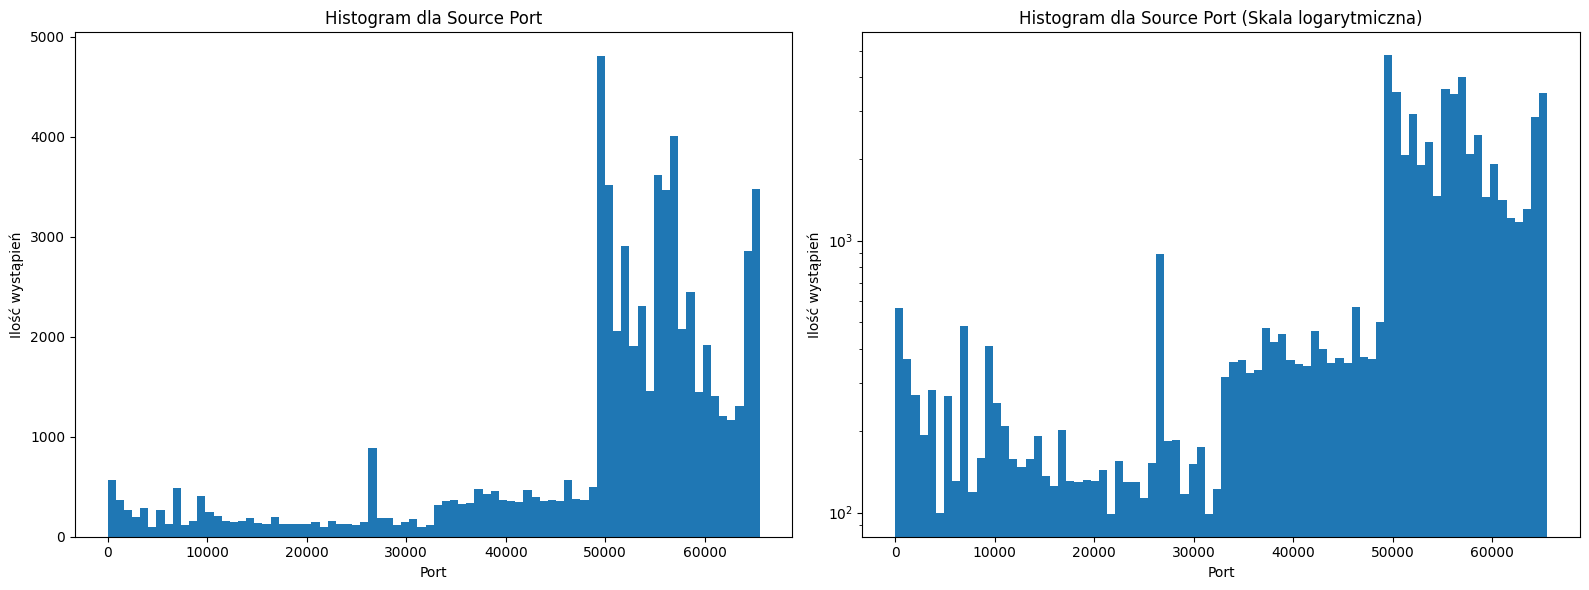

In [172]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].hist(data['Source Port'], bins=80)
axes[0].set_title('Histogram dla Source Port')
axes[0].set_xlabel('Port')
axes[0].set_ylabel('Ilość wystąpień')

axes[1].hist(data['Source Port'], bins=80)
axes[1].set_title('Histogram dla Source Port (Skala logarytmiczna)')
axes[1].set_xlabel('Port')
axes[1].set_ylabel('Ilość wystąpień')
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

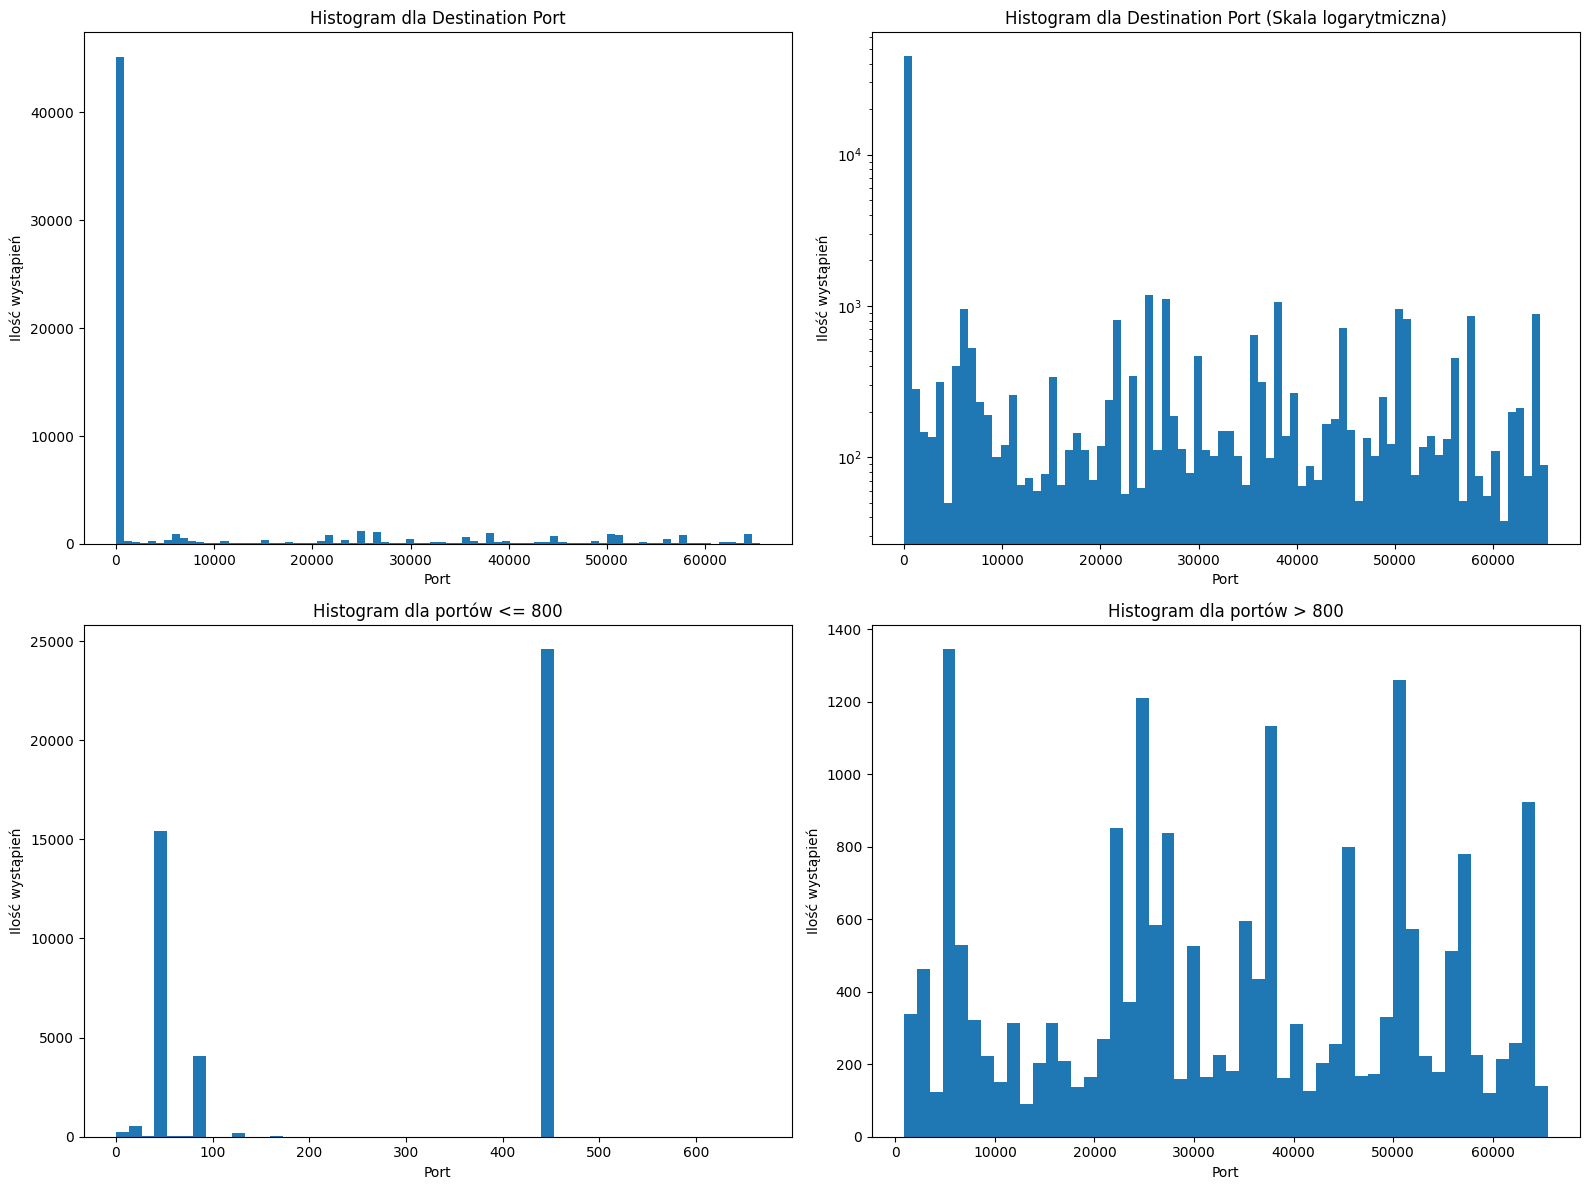

68.87% wszystkich wpisów posiada port mniejszy niz 800


In [173]:
col = data['Destination Port']
fix, axes = plt.subplots(2, 2, figsize=(16, 12))

splitPoint = 800

axes[0, 0].hist(col, bins=80)
axes[0, 0].set_title('Histogram dla Destination Port')
axes[0, 0].set_xlabel('Port')
axes[0, 0].set_ylabel('Ilość wystąpień')

axes[0, 1].hist(col, bins=80)
axes[0, 1].set_title('Histogram dla Destination Port (Skala logarytmiczna)')
axes[0, 1].set_xlabel('Port')
axes[0, 1].set_ylabel('Ilość wystąpień')
axes[0, 1].set_yscale('log')

axes[1, 0].hist(col[col <= splitPoint], bins=50)
axes[1, 0].set_title('Histogram dla portów <= {}'.format(splitPoint))
axes[1, 0].set_xlabel('Port')
axes[1, 0].set_ylabel('Ilość wystąpień')


axes[1, 1].hist(col[col > splitPoint], bins=50)
axes[1, 1].set_title('Histogram dla portów > {}'.format(splitPoint))
axes[1, 1].set_xlabel('Port')
axes[1, 1].set_ylabel('Ilość wystąpień')

plt.tight_layout()
plt.show()

print('{:.2f}% wszystkich wpisów posiada port mniejszy niz {}'.format(len(col[col < splitPoint]) / len(col) * 100, splitPoint))

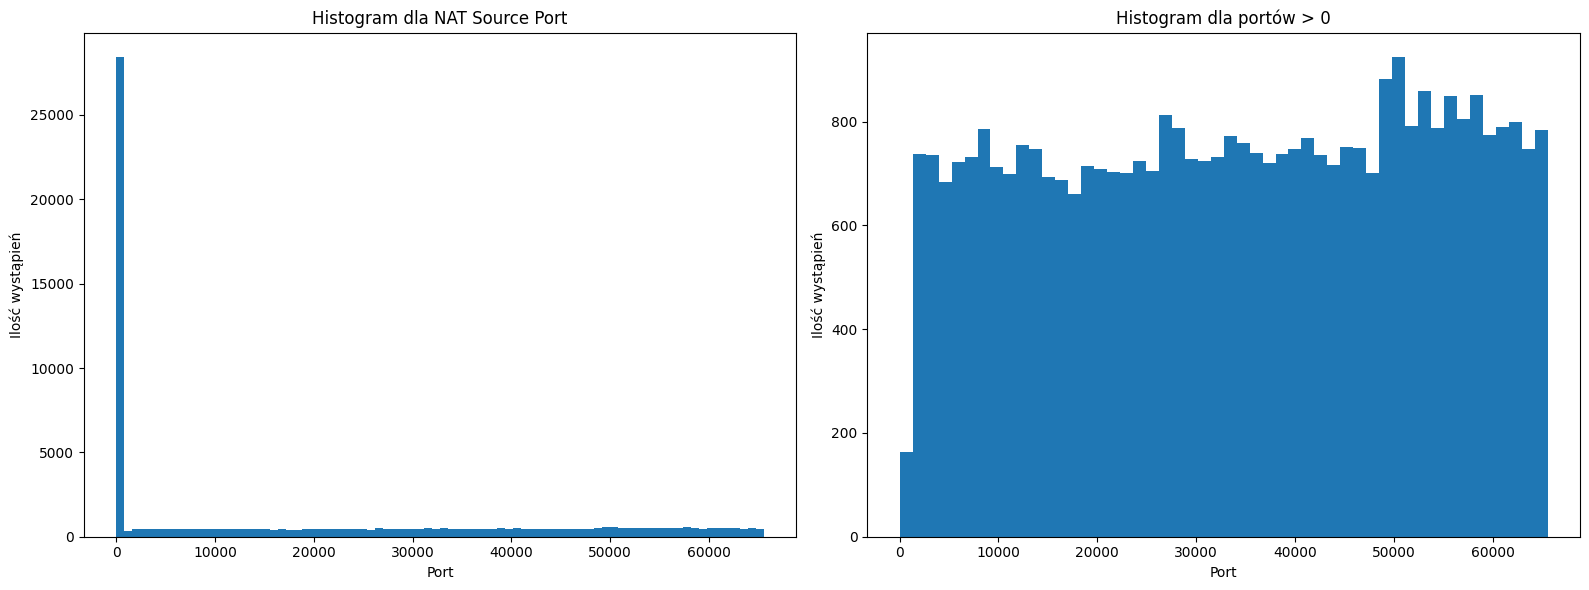

43.39% wszystkich wpisów posiada port źródłowy NAT równy 0


In [174]:
col_name = 'NAT Source Port'
col = data[col_name]
fix, axes = plt.subplots(1, 2, figsize=(16, 6))

splitPoint = 0

axes[0].hist(col, bins=80)
axes[0].set_title('Histogram dla {}'.format(col_name))
axes[0].set_xlabel('Port')
axes[0].set_ylabel('Ilość wystąpień')

axes[1].hist(col[col > splitPoint], bins=50)
axes[1].set_title('Histogram dla portów > {}'.format(splitPoint))
axes[1].set_xlabel('Port')
axes[1].set_ylabel('Ilość wystąpień')

plt.tight_layout()
plt.show()

print('{:.2f}% wszystkich wpisów posiada port źródłowy NAT równy {}'.format(len(col[col == splitPoint]) / len(col) * 100, splitPoint))

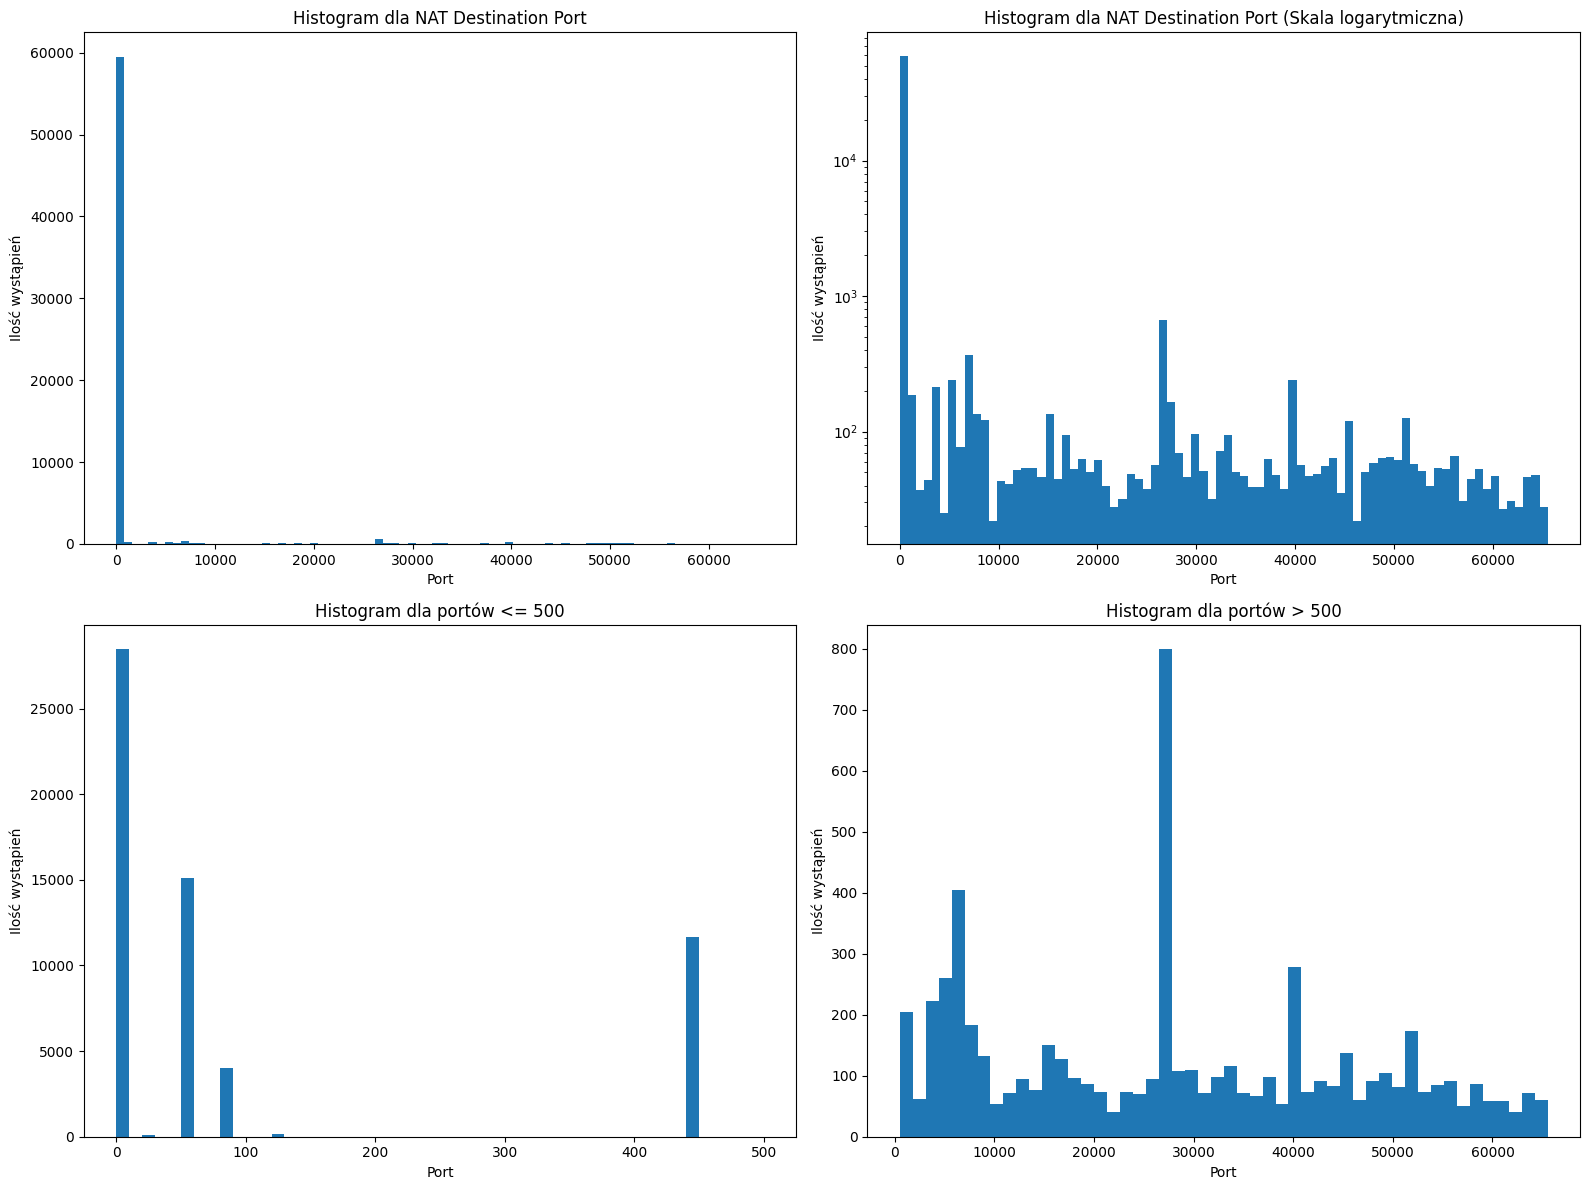

90.81% wszystkich wpisów posiada port mniejszy niz 500


In [175]:
col_name = 'NAT Destination Port'
col = data[col_name]
fix, axes = plt.subplots(2, 2, figsize=(16, 12))

splitPoint = 500

axes[0, 0].hist(col, bins=80)
axes[0, 0].set_title('Histogram dla {}'.format(col_name))
axes[0, 0].set_xlabel('Port')
axes[0, 0].set_ylabel('Ilość wystąpień')

axes[0, 1].hist(col, bins=80)
axes[0, 1].set_title('Histogram dla {} (Skala logarytmiczna)'.format(col_name))
axes[0, 1].set_xlabel('Port')
axes[0, 1].set_ylabel('Ilość wystąpień')
axes[0, 1].set_yscale('log')

axes[1, 0].hist(col[col <= splitPoint], bins=50)
axes[1, 0].set_title('Histogram dla portów <= {}'.format(splitPoint))
axes[1, 0].set_xlabel('Port')
axes[1, 0].set_ylabel('Ilość wystąpień')


axes[1, 1].hist(col[col > splitPoint], bins=50)
axes[1, 1].set_title('Histogram dla portów > {}'.format(splitPoint))
axes[1, 1].set_xlabel('Port')
axes[1, 1].set_ylabel('Ilość wystąpień')

plt.tight_layout()
plt.show()

print('{:.2f}% wszystkich wpisów posiada port mniejszy niz {}'.format(len(col[col < splitPoint]) / len(col) * 100, splitPoint))

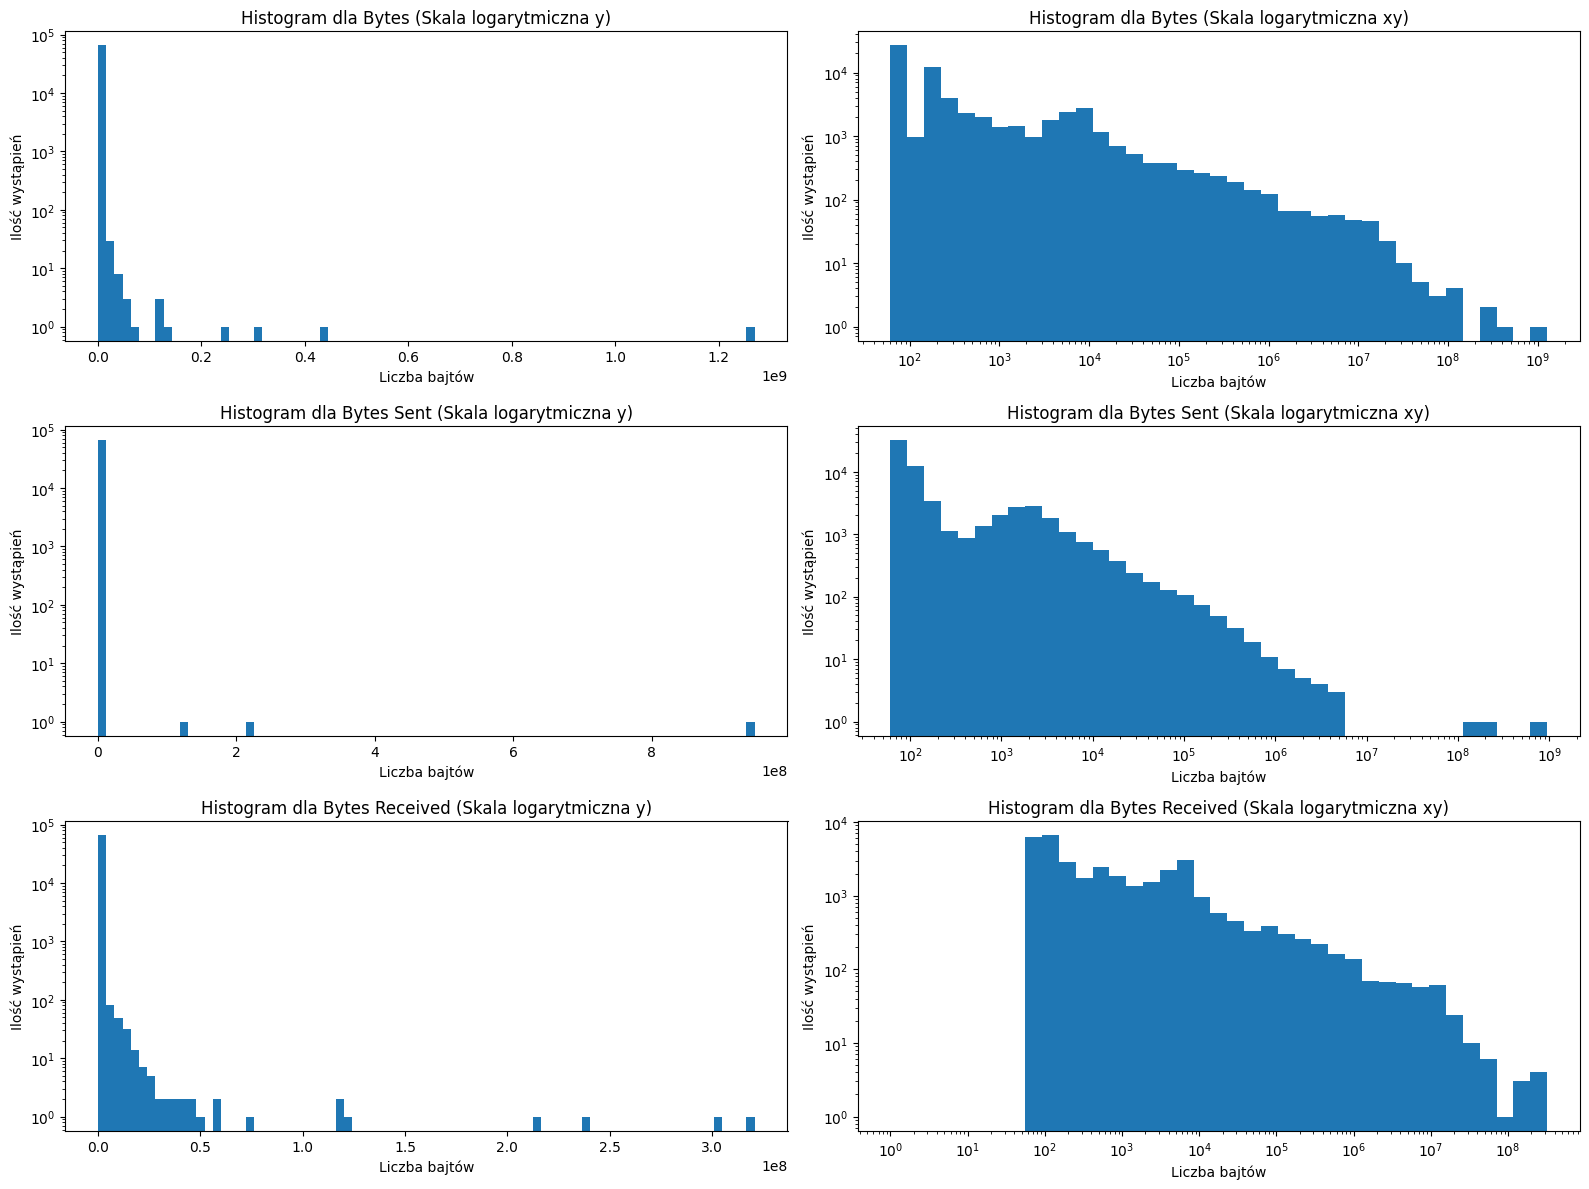

In [176]:
col_names = ['Bytes', 'Bytes Sent', 'Bytes Received']

fix, axes = plt.subplots(3, 2, figsize=(16, 12))

for i, col_name in enumerate(col_names):
    col = data[col_name]
    ax = axes[i, 0]
    ax.hist(col, bins=80)
    ax.set_title('Histogram dla {} (Skala logarytmiczna y)'.format(col_name))
    ax.set_xlabel('Liczba bajtów')
    ax.set_ylabel('Ilość wystąpień')
    ax.set_yscale('log')

    ax = axes[i, 1]
    bins_log = np.geomspace(col.min() + 1, col.max(), 40)
    ax.hist(col, bins=bins_log)
    ax.set_title('Histogram dla {} (Skala logarytmiczna xy)'.format(col_name))
    ax.set_xlabel('Liczba bajtów')
    ax.set_ylabel('Ilość wystąpień')
    ax.set_yscale('log')
    ax.set_xscale('log')

plt.tight_layout()
plt.show()

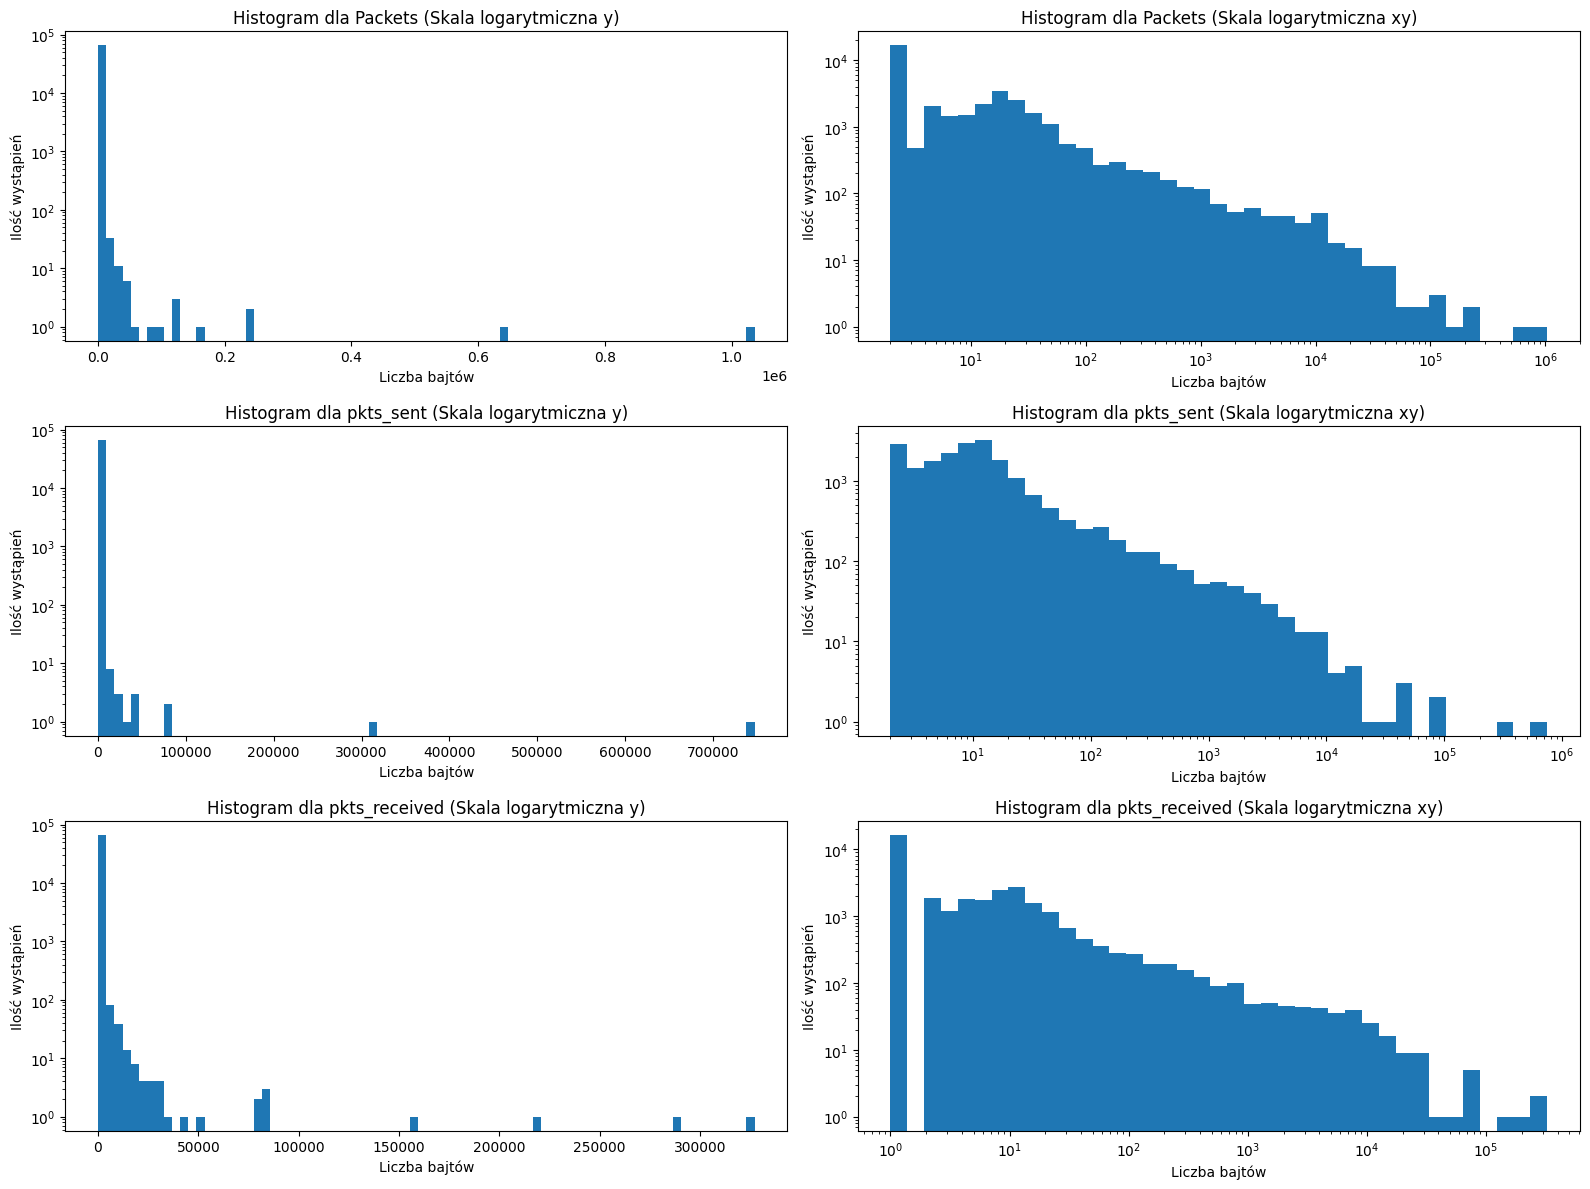

In [177]:
col_names = ['Packets', 'pkts_sent', 'pkts_received']

fix, axes = plt.subplots(3, 2, figsize=(16, 12))

for i, col_name in enumerate(col_names):
    col = data[col_name]
    ax = axes[i, 0]
    ax.hist(col, bins=80)
    ax.set_title('Histogram dla {} (Skala logarytmiczna y)'.format(col_name))
    ax.set_xlabel('Liczba bajtów')
    ax.set_ylabel('Ilość wystąpień')
    ax.set_yscale('log')

    ax = axes[i, 1]
    bins_log = np.geomspace(col.min() + 1, col.max(), 40)
    ax.hist(col, bins=bins_log)
    ax.set_title('Histogram dla {} (Skala logarytmiczna xy)'.format(col_name))
    ax.set_xlabel('Liczba bajtów')
    ax.set_ylabel('Ilość wystąpień')
    ax.set_yscale('log')
    ax.set_xscale('log')

plt.tight_layout()
plt.show()

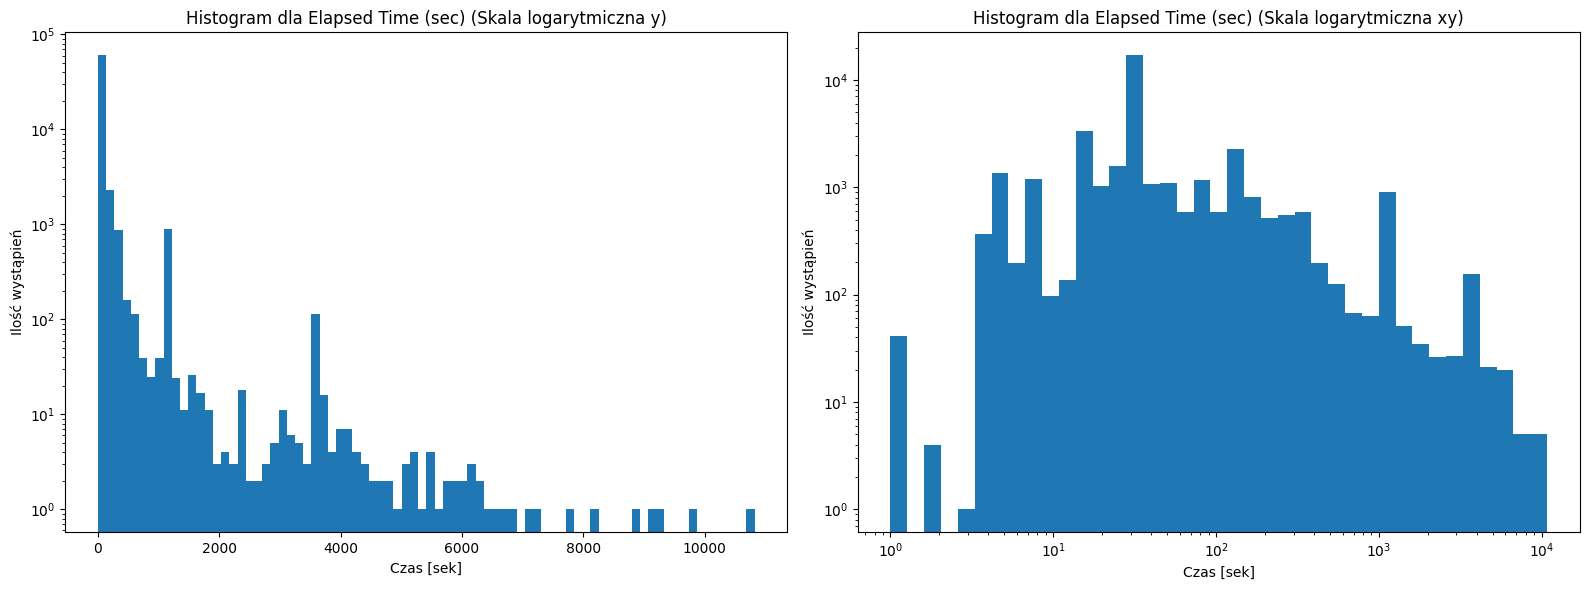

In [178]:
col_name = 'Elapsed Time (sec)'
col = data[col_name]
fix, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].hist(col, bins=80)
axes[0].set_title('Histogram dla {} (Skala logarytmiczna y)'.format(col_name))
axes[0].set_xlabel('Czas [sek]')
axes[0].set_ylabel('Ilość wystąpień')
axes[0].set_yscale('log')

bins_log = np.geomspace(col.min() + 1, col.max(), 40)
axes[1].hist(col, bins=bins_log)
axes[1].set_title('Histogram dla {} (Skala logarytmiczna xy)'.format(col_name))
axes[1].set_xlabel('Czas [sek]')
axes[1].set_ylabel('Ilość wystąpień')
axes[1].set_yscale('log')
axes[1].set_xscale('log')

plt.tight_layout()
plt.show()